In [3]:
import numpy as np
import matplotlib.pyplot as plt

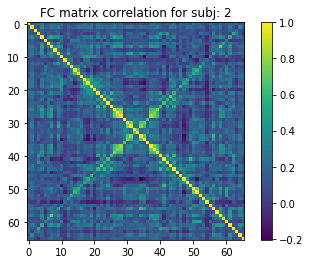

In [2]:
subject=2
a=np.loadtxt("../Data/fMRI/subj"+str(subject)+"_block1.txt")
b=np.loadtxt("../Data/fMRI/subj"+str(subject)+"_block2.txt")
signal=np.concatenate((a,b))
fc=np.corrcoef(signal, rowvar=False)

plt.imshow(fc)
plt.colorbar()
plt.title("FC matrix correlation for subj: "+str(subject))
plt.show()

In [ ]:
def fmri_signal(subject=1, all_blocks=False):
    if all_blocks==True:
        a=np.loadtxt("../Data/fMRI/subj"+str(subject)+"_block1.txt")
        b=np.loadtxt("../Data/fMRI/subj"+str(subject)+"_block2.txt")
        return np.concatenate((a,b))
    elif all_blocks==False:
        a=np.loadtxt("../Data/fMRI/subj"+str(subject)+"_block1.txt")
        return a

correlations=np.zeros((24,66,66), dtype=np.float64)
for subj in range(1,25,1):
    correlations[subj-1]=np.corrcoef(fmri_signal(subj, all_blocks=True), rowvar=False)

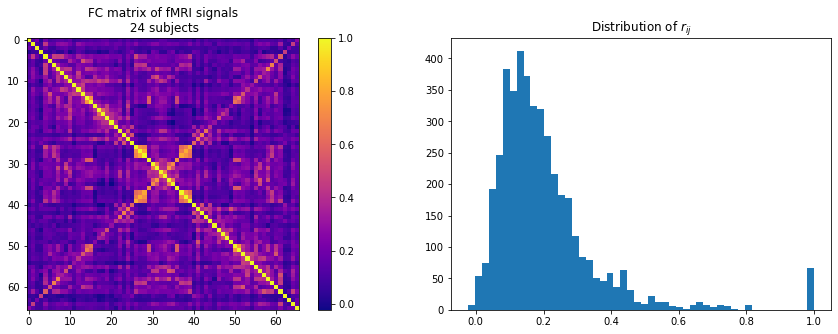

In [58]:
corr=np.mean(correlations, axis=0)
fig, ax=plt.subplots(1,2, figsize=(15,5))

aa=ax[0].imshow(corr, cmap='plasma')
ax[0].set_title("FC matrix of fMRI signals\n 24 subjects")

ax[1].hist(corr.flatten(), bins=50)
ax[1].set_title("Distribution of $r_{ij}$")
plt.colorbar(aa,ax=ax[0])
plt.show()